<a href="https://colab.research.google.com/github/alaalial/Alaa-s-Homepage/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf

In [5]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True )

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4185427239646018133
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1747960849448187668
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [5]:
!cat /proc/meminfo

MemTotal:       13302920 kB
MemFree:         8985136 kB
MemAvailable:   11700624 kB
Buffers:          130048 kB
Cached:          2516708 kB
SwapCached:            0 kB
Active:          1627240 kB
Inactive:        2315040 kB
Active(anon):    1033472 kB
Inactive(anon):    10700 kB
Active(file):     593768 kB
Inactive(file):  2304340 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               412 kB
Writeback:             0 kB
AnonPages:       1295512 kB
Mapped:           705516 kB
Shmem:             11440 kB
KReclaimable:     117708 kB
Slab:             172788 kB
SReclaimable:     117708 kB
SUnreclaim:        55080 kB
KernelStack:        5216 kB
PageTables:        14424 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3928000 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       51368 kB
VmallocChunk:          0 kB
Percpu:          

In [1]:
!pip install -q keras


In [10]:
import pandas as pd 

Epoch 1/100
536/536 [==============================] - 5s 8ms/step - loss: 0.6045 - accuracy: 0.7710 - val_loss: 0.5539 - val_accuracy: 0.7864
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5277 - accuracy: 0.7949 - val_loss: 0.5015 - val_accuracy: 0.7982
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4871 - accuracy: 0.8041 - val_loss: 0.4746 - val_accuracy: 0.8031
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4652 - accuracy: 0.8108 - val_loss: 0.4599 - val_accuracy: 0.8035
Epoch 5/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4521 - accuracy: 0.8123 - val_loss: 0.4520 - val_accuracy: 0.8054
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4437 - accuracy: 0.8155 - val_loss: 0.4474 - val_accuracy: 0.8069
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4379 - accuracy: 0.8175 - val_loss: 0.4444 - val_accuracy: 0.8092

KeyError: ignored

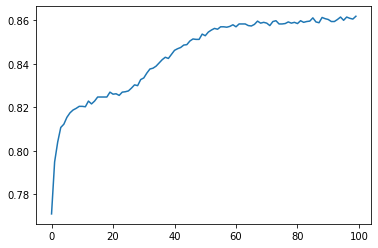

In [17]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
